In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Reddit_Data.csv')

In [3]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
df.shape

(37249, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [6]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [7]:
df[df['clean_comment'].isna()]['category'].value_counts()

category
0    100
Name: count, dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(350)

In [10]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [11]:
df.duplicated().sum()

np.int64(350)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df[df['clean_comment'].str.strip()=='']


,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [15]:
df = df[~(df['clean_comment'].str.strip() == '')]


In [16]:
df['clean_comment'] =df['clean_comment'].str.lower()

In [17]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [18]:
df[df['clean_comment'].apply(lambda x:x.endswith('')or x.startswith(''))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [19]:
df['clean_comment'][0]

' family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches '

In [20]:
df['clean_comment']=df['clean_comment'].str.strip()

In [21]:
url_pattern = r'https?://\S+'

contains_url = df[df['clean_comment'].astype(str).str.contains(url_pattern, regex=True, na=False)]
contains_url.head()


,clean_comment,category


In [22]:
newline = df[df['clean_comment'].astype(str).str.contains('\n')]


In [23]:
newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


eda

<Axes: xlabel='category', ylabel='count'>

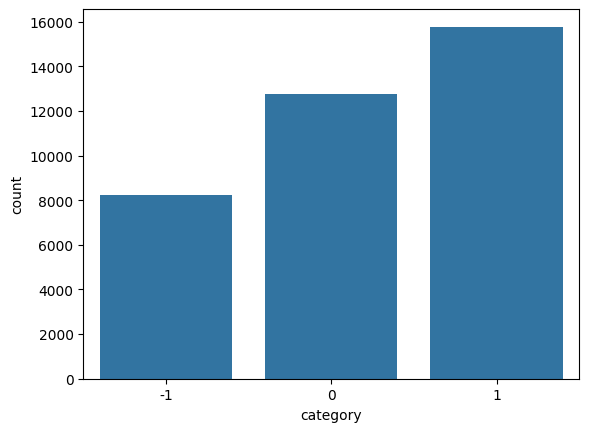

In [24]:
sns.countplot(data=df,x='category')

<Axes: ylabel='proportion'>

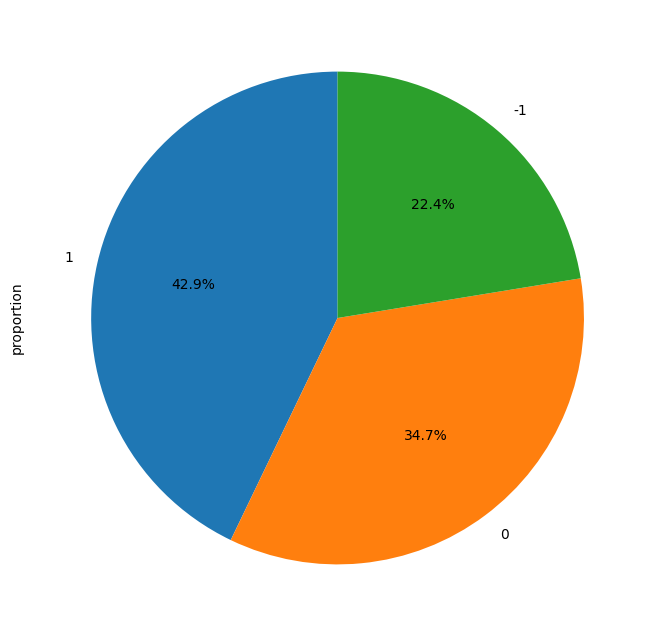

In [25]:
df['category'].value_counts(normalize=True).mul(100).plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))

In [26]:

df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

In [27]:
df.head()

,clean_comment,category,word_count
0,family mormon have never tried explain them th...,1,39
1,buddhism has very much lot compatible with chr...,1,196
2,seriously don say thing first all they won get...,-1,86
3,what you have learned yours and only yours wha...,0,29
4,for your own benefit you may want read living ...,1,112


In [28]:
df.shape

(36793, 3)

In [29]:
df['word_count'].describe()

count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

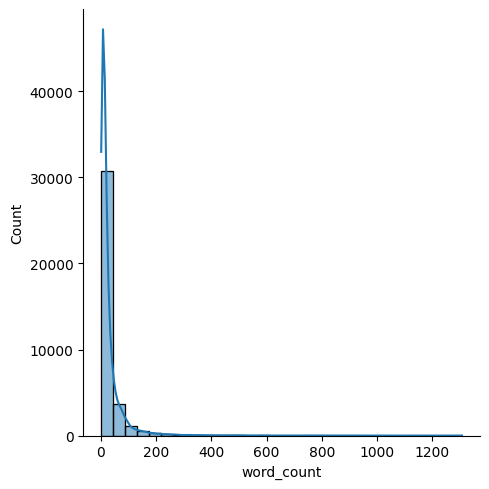

In [30]:
sns.displot(df['word_count'], kde=True, bins=30)

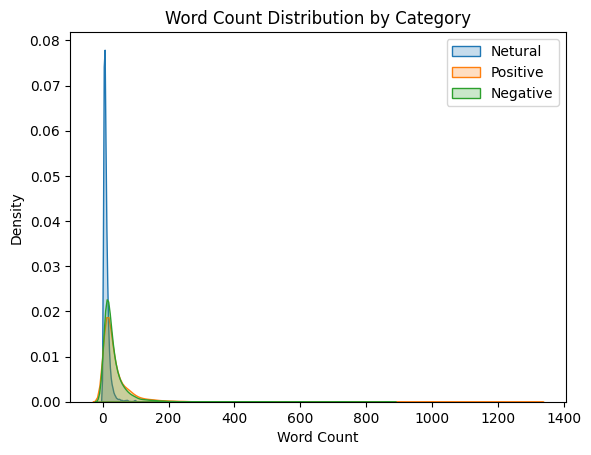

In [31]:
sns.kdeplot(df[df['category']==0]['word_count'], label='Netural', fill=True)
sns.kdeplot(df[df['category']==1]['word_count'], label='Positive', fill=True)
sns.kdeplot(df[df['category']==-1]['word_count'], label='Negative', fill=True)
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.legend()

here few no of words are used in netural comments where the no of words used in negative and postive setniment is more

<Axes: xlabel='category', ylabel='word_count'>

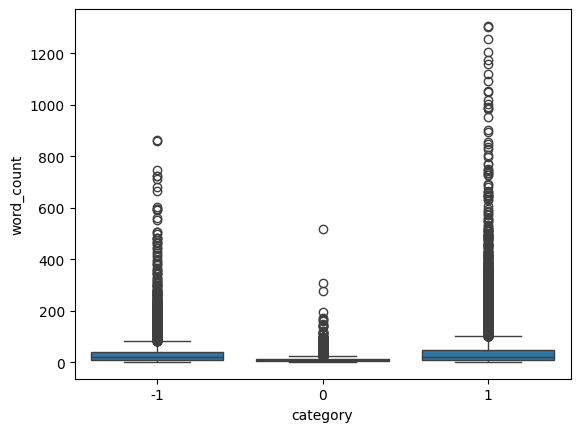

In [32]:
sns.boxplot(x='category', y='word_count', data=df)

here we can we there a lot of outliers in this data



<Axes: xlabel='category', ylabel='word_count'>

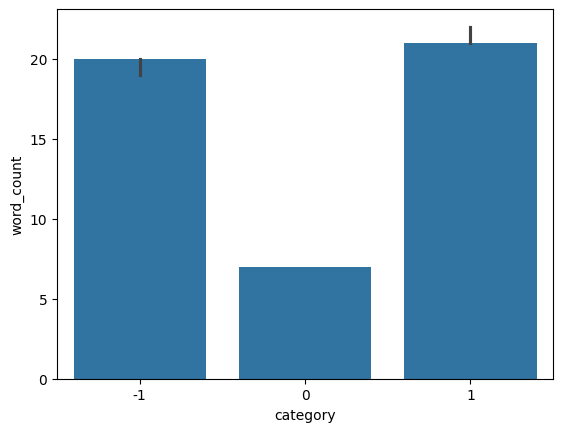

In [33]:
sns.barplot(x='category', y='word_count', data=df, estimator=np.median)

In [34]:
df['num_stopwords'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in nltk.corpus.stopwords.words('english')]))

In [35]:
df.head()

,clean_comment,category,word_count,num_stopwords
0,family mormon have never tried explain them th...,1,39,13
1,buddhism has very much lot compatible with chr...,1,196,59
2,seriously don say thing first all they won get...,-1,86,40
3,what you have learned yours and only yours wha...,0,29,15
4,for your own benefit you may want read living ...,1,112,45


<Axes: xlabel='category', ylabel='num_stopwords'>

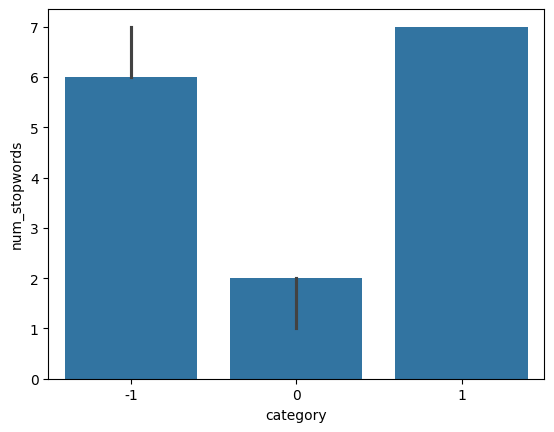

In [36]:
sns.barplot(x='category', y='num_stopwords', data=df, estimator=np.median)

<Axes: xlabel='count', ylabel='stopword'>

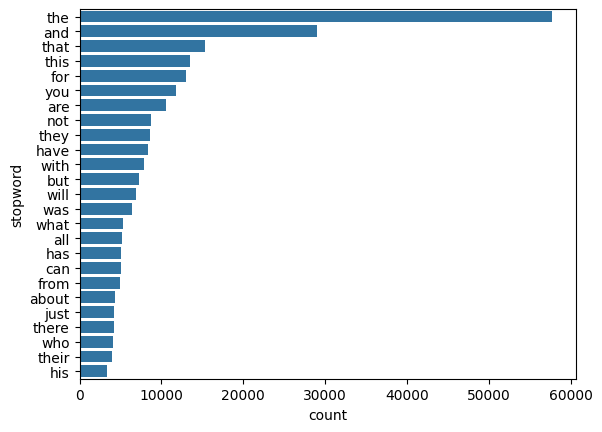

In [37]:
from collections import Counter
all_stopwords = [word for word in df['clean_comment'].str.split().sum() if word in nltk.corpus.stopwords.words('english')]
most_common_stopwords = Counter(all_stopwords).most_common(25)
top_stopwords = pd.DataFrame(most_common_stopwords, columns=['stopword', 'count'])
sns.barplot(x='count', y='stopword', data=top_stopwords, orient='h')

In [38]:
df['num_chars'] = df['clean_comment'].apply(len)

In [39]:
df.sample(10)

,clean_comment,category,word_count,num_stopwords,num_chars
1868,staying home for this one save money and pain ...,1,24,10,133
18541,this something that bjp gov would ever doesnt ...,-1,13,4,72
18677,can barely write research paper big topic such...,1,24,7,140
97,have heard that due the booze policy women fee...,1,23,6,131
10124,team ppr pick marshall snead britt @ howard te...,1,71,15,439
18982,after trump now our conspiracy theorist,0,6,3,39
8083,could interesting fact pune called oxford the ...,1,23,5,144
5398,non sapete cosa scrivere traducete proverbi mo...,1,332,64,1870
18628,well you can sure that all world leaders mock ...,1,11,4,57
10920,what sure takes away some more financial liber...,1,26,10,160


In [40]:
df['num_chars'].describe()

count    36793.000000
mean       181.852798
std        359.702163
min          1.000000
25%         38.000000
50%         80.000000
75%        184.000000
max       8664.000000
Name: num_chars, dtype: float64

In [41]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

In [42]:
from nltk.tokenize import word_tokenize


In [43]:
import re

In [48]:


df['clean_comment'] = df['clean_comment'].apply(
    lambda x: re.sub(r'[^a-zA-Z0-9\s!?.,]', '', str(x))
)


In [49]:
all_text=''.join(df['clean_comment'])

In [50]:
char_frequency= Counter(all_text)
char_frequency_df= pd.DataFrame(char_frequency.items(), columns=['character', 'frequency'])


In [51]:
char_frequency_df

,character,frequency
0,f,78866
1,a,481134
2,m,155561
3,i,401388
4,l,250104
5,y,115420
6,,1054029
7,o,379908
8,r,331425
9,n,388465


In [53]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) - {'not','no','however','but','yet','still','although'}
df['clean_comment']=df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)

In [54]:
df.head()

,clean_comment,category,word_count,num_stopwords,num_chars
0,family mormon never tried explain still stare ...,1,39,13,259
1,buddhism much lot compatible christianity espe...,1,196,59,1268
2,seriously say thing first get complex explain ...,-1,86,40,459
3,learned want teach different focus goal not wr...,0,29,15,167
4,benefit may want read living buddha living chr...,1,112,45,690


In [55]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


In [56]:
df.head()

,clean_comment,category,word_count,num_stopwords,num_chars
0,family mormon never tried explain still stare ...,1,39,13,259
1,buddhism much lot compatible christianity espe...,1,196,59,1268
2,seriously say thing first get complex explain ...,-1,86,40,459
3,learned want teach different focus goal not wr...,0,29,15,167
4,benefit may want read living buddha living chr...,1,112,45,690


In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def plot_wordcloud(text, title=None):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

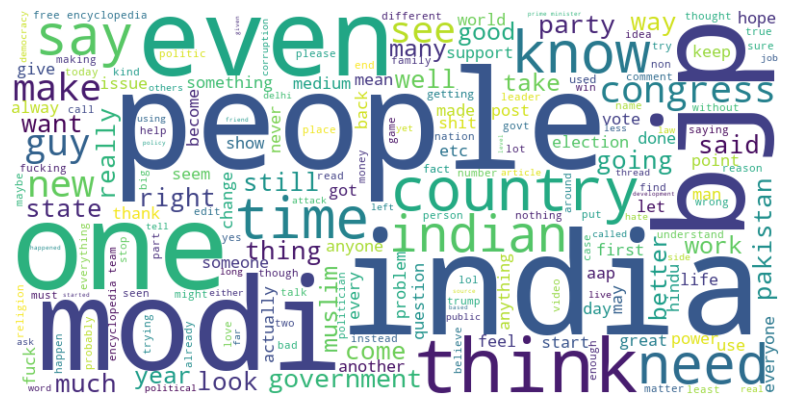

In [62]:
plot_wordcloud(' '.join(df['clean_comment']))

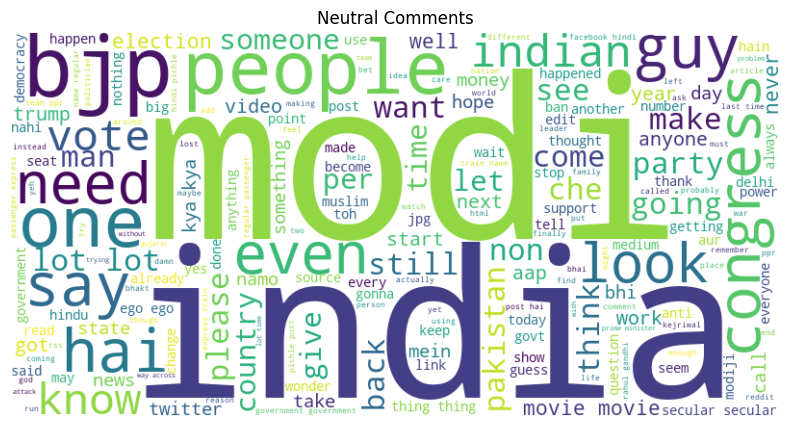

In [63]:
plot_wordcloud(' '.join(df[df['category'] == 0]['clean_comment']), title='Neutral Comments')

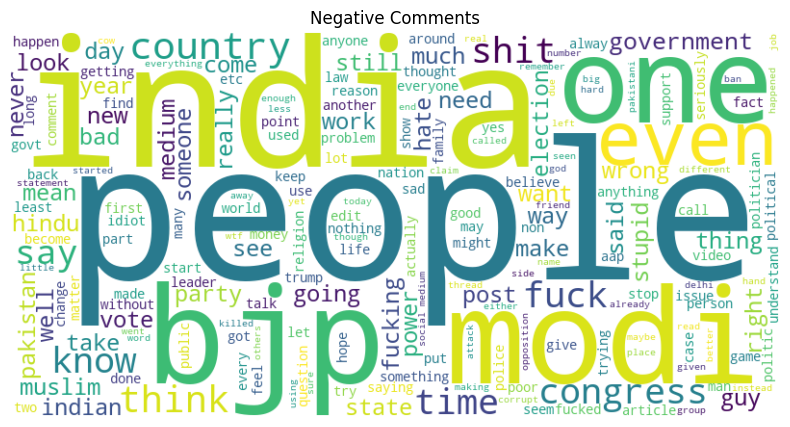

In [65]:
plot_wordcloud(' '.join(df[df['category'] == -1]['clean_comment']), title='Negative Comments')